In [44]:
import surprise
import pandas as pd
import os
import numpy as np

# Recommender System with CF
## read data

In [45]:
df= pd.read_csv('pd.csv',encoding='cp949')
del df['Unnamed: 0']
df.head(10)

,BIZ_UNIT,PD_S_C,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM
0,A01,1,457,2,60PRD,52.0,468040,2,20150830,19,23900,1,우육,육류,식품
1,A01,1,12934,2,40PRD,120.0,401604,31,20150524,16,15000,1,우육,육류,식품
2,A01,1,5565,2,40PRD,480.0,457136,25,20151213,19,21440,1,우육,육류,식품
3,A01,1,4879,2,40PRD,55.0,336179,2,20150608,17,16340,1,우육,육류,식품
4,A01,1,14235,2,60PRD,62.0,396537,12,20150604,17,76200,1,우육,육류,식품
5,A01,1,611,2,60PRD,140.0,416381,37,20150306,19,90000,1,우육,육류,식품
6,A01,1,4713,1,40PRD,340.0,437850,11,20150614,17,15000,1,우육,육류,식품
7,A01,1,1696,2,50PRD,480.0,375999,25,20150103,15,57000,1,우육,육류,식품
8,A01,1,2671,2,50PRD,100.0,353177,8,20150115,16,10430,1,우육,육류,식품
9,A01,1,17241,2,30PRD,140.0,375321,37,20151015,19,10000,1,우육,육류,식품


## make 'Freq' feature

In [46]:
S= pd.read_csv('count.csv',encoding='cp949')
del S['Unnamed: 0']
S.head(10)

,ID,PD_S_NM,V1
0,1,L/C 아웃도어,1
1,1,L/C골프의류,2
2,1,N/B골프의류,4
3,1,계육,1
4,1,기능성침대,1
5,1,기타생선,1
6,1,내의,1
7,1,돈육,1
8,1,디스커버리,1
9,1,디저트류,3


In [47]:
# 빈도 & df merge
df_m=pd.merge(df,S,on=['ID','PD_S_NM'])
df_m.head(10)

,BIZ_UNIT,PD_S_C,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM,V1
0,A01,1,457,2,60PRD,52.0,468040,2,20150830,19,23900,1,우육,육류,식품,7
1,A01,1,457,2,60PRD,52.0,157800,2,20150616,12,24430,1,우육,육류,식품,7
2,A01,1,457,2,60PRD,52.0,480929,2,20150418,19,15900,1,우육,육류,식품,7
3,A01,1,457,2,60PRD,52.0,404273,2,20151225,16,22770,1,우육,육류,식품,7
4,A01,1,457,2,60PRD,52.0,250564,2,20150214,12,75840,1,우육,육류,식품,7
5,A01,1,457,2,60PRD,52.0,480929,2,20150418,19,20790,1,우육,육류,식품,7
6,A01,1,457,2,60PRD,52.0,436273,2,20150217,17,97340,1,우육,육류,식품,7
7,A01,1,12934,2,40PRD,120.0,401604,31,20150524,16,15000,1,우육,육류,식품,1
8,A01,1,5565,2,40PRD,480.0,457136,25,20151213,19,21440,1,우육,육류,식품,6
9,A01,1,5565,2,40PRD,480.0,237706,25,20150824,15,38430,1,우육,육류,식품,6


## 평준화 -> 파생변수(Scared_v1) 생성

### 1.성별,나이대별 구매평균 빈도

In [48]:
df_by_age=df_m[['PD_S_NM','AGE_PRD','GENDER','V1']].groupby(['PD_S_NM','AGE_PRD','GENDER']).mean()
df_by_age=df_by_age.reset_index()
df_by_age.columns=['PD_S_NM','AGE_PRD','GENDER','M_V1']
df_by_age[0:5]

,PD_S_NM,AGE_PRD,GENDER,M_V1
0,1000ml이상,20PRD,1,3.395062
1,1000ml이상,20PRD,2,4.150685
2,1000ml이상,30PRD,1,9.112450
3,1000ml이상,30PRD,2,8.981735
4,1000ml이상,40PRD,1,2.608392


### 2.성별,나이대별 MIN&MAX

In [49]:
df_by_age_min = df_m[['PD_S_NM','AGE_PRD','GENDER','V1']].groupby(['PD_S_NM','AGE_PRD','GENDER']).min()
df_by_age_min = df_by_age_min.reset_index()
df_by_age_min.columns = ['PD_S_NM','AGE_PRD','GENDER','MIN_V1']
df_by_age_min.head(n=10)

,PD_S_NM,AGE_PRD,GENDER,MIN_V1
0,1000ml이상,20PRD,1,1
1,1000ml이상,20PRD,2,1
2,1000ml이상,30PRD,1,1
3,1000ml이상,30PRD,2,1
4,1000ml이상,40PRD,1,1
5,1000ml이상,40PRD,2,1
6,1000ml이상,50PRD,1,1
7,1000ml이상,50PRD,2,1
8,1000ml이상,60PRD,1,1
9,1000ml이상,60PRD,2,1


In [50]:
df_by_age_max = df_m[['PD_S_NM','AGE_PRD','GENDER','V1']].groupby(['PD_S_NM','AGE_PRD','GENDER']).max()
df_by_age_max = df_by_age_max.reset_index()
df_by_age_max.columns = ['PD_S_NM','AGE_PRD','GENDER','MAX_V1']
df_by_age_max.head(n=10)

,PD_S_NM,AGE_PRD,GENDER,MAX_V1
0,1000ml이상,20PRD,1,9
1,1000ml이상,20PRD,2,9
2,1000ml이상,30PRD,1,27
3,1000ml이상,30PRD,2,30
4,1000ml이상,40PRD,1,9
5,1000ml이상,40PRD,2,28
6,1000ml이상,50PRD,1,32
7,1000ml이상,50PRD,2,73
8,1000ml이상,60PRD,1,5
9,1000ml이상,60PRD,2,14


In [51]:
# merge
df_by_age_m=pd.merge(df_m,df_by_age,on=['PD_S_NM','AGE_PRD','GENDER'])
df_by_age_m = pd.merge(df_by_age_m,df_by_age_min,on=['PD_S_NM','AGE_PRD','GENDER'])
df_by_age_m = pd.merge(df_by_age_m,df_by_age_max,on=['PD_S_NM','AGE_PRD','GENDER'])
df_by_age_m.head(10)

,BIZ_UNIT,PD_S_C,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM,V1,M_V1,MIN_V1,MAX_V1
0,A01,1,457,2,60PRD,52.0,468040,2,20150830,19,23900,1,우육,육류,식품,7,21.369443,1,128
1,A01,1,457,2,60PRD,52.0,157800,2,20150616,12,24430,1,우육,육류,식품,7,21.369443,1,128
2,A01,1,457,2,60PRD,52.0,480929,2,20150418,19,15900,1,우육,육류,식품,7,21.369443,1,128
3,A01,1,457,2,60PRD,52.0,404273,2,20151225,16,22770,1,우육,육류,식품,7,21.369443,1,128
4,A01,1,457,2,60PRD,52.0,250564,2,20150214,12,75840,1,우육,육류,식품,7,21.369443,1,128
5,A01,1,457,2,60PRD,52.0,480929,2,20150418,19,20790,1,우육,육류,식품,7,21.369443,1,128
6,A01,1,457,2,60PRD,52.0,436273,2,20150217,17,97340,1,우육,육류,식품,7,21.369443,1,128
7,A01,1,14235,2,60PRD,62.0,396537,12,20150604,17,76200,1,우육,육류,식품,2,21.369443,1,128
8,A01,1,14235,2,60PRD,62.0,396537,12,20150604,17,16890,1,우육,육류,식품,2,21.369443,1,128
9,A01,1,611,2,60PRD,140.0,416381,37,20150306,19,90000,1,우육,육류,식품,128,21.369443,1,128


## 파생변수 생성


In [52]:
def scaled_v1(V1,M_V1,min_V1,max_V1,is_smaller=True):
    if is_smaller:
        return (V1-min_V1)*0.5/(M_V1-min_V1)
    else:
        return ((V1-M_V1)*0.5 /(max_V1-M_V1))+ 0.5

In [53]:
aa = df_by_age_m.loc[df_by_age_m.V1 < df_by_age_m.M_V1,:].copy()
aa.loc[:,'V1_SCALED'] = scaled_v1(aa.V1,aa.M_V1,aa.MIN_V1,aa.MAX_V1)
aa.head()

,BIZ_UNIT,PD_S_C,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM,V1,M_V1,MIN_V1,MAX_V1,V1_SCALED
0,A01,1,457,2,60PRD,52.0,468040,2,20150830,19,23900,1,우육,육류,식품,7,21.369443,1,128,0.147279
1,A01,1,457,2,60PRD,52.0,157800,2,20150616,12,24430,1,우육,육류,식품,7,21.369443,1,128,0.147279
2,A01,1,457,2,60PRD,52.0,480929,2,20150418,19,15900,1,우육,육류,식품,7,21.369443,1,128,0.147279
3,A01,1,457,2,60PRD,52.0,404273,2,20151225,16,22770,1,우육,육류,식품,7,21.369443,1,128,0.147279
4,A01,1,457,2,60PRD,52.0,250564,2,20150214,12,75840,1,우육,육류,식품,7,21.369443,1,128,0.147279


In [54]:
bb = df_by_age_m.loc[df_by_age_m.V1 >= df_by_age_m.M_V1,:].copy()
bb

,BIZ_UNIT,PD_S_C,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM,V1,M_V1,MIN_V1,MAX_V1
9,A01,1,611,2,60PRD,140.0,416381,37,20150306,19,90000,1,우육,육류,식품,128,21.369443,1,128
10,A01,1,611,2,60PRD,140.0,186620,37,20151002,12,36620,1,우육,육류,식품,128,21.369443,1,128
11,A01,1,611,2,60PRD,140.0,317306,37,20150531,17,39420,1,우육,육류,식품,128,21.369443,1,128
12,A01,1,611,2,60PRD,140.0,205065,37,20150807,12,22080,1,우육,육류,식품,128,21.369443,1,128
13,A01,1,611,2,60PRD,140.0,411373,37,20150120,17,3000,1,우육,육류,식품,128,21.369443,1,128
14,A01,1,611,2,60PRD,140.0,299941,37,20150614,14,43000,1,우육,육류,식품,128,21.369443,1,128
15,A01,1,611,2,60PRD,140.0,223131,37,20151216,13,20000,1,우육,육류,식품,128,21.369443,1,128
16,A01,1,611,2,60PRD,140.0,338158,37,20151222,16,46730,1,우육,육류,식품,128,21.369443,1,128
17,A01,1,611,2,60PRD,140.0,107258,37,20150324,11,23140,1,우육,육류,식품,128,21.369443,1,128
18,A01,1,611,2,60PRD,140.0,301004,37,20150911,14,40000,1,우육,육류,식품,128,21.369443,1,128


In [55]:
bb = df_by_age_m.loc[df_by_age_m.V1 >= df_by_age_m.M_V1,:].copy()
bb.loc[:,'V1_SCALED'] = scaled_v1(bb.V1,bb.M_V1,bb.MIN_V1,bb.MAX_V1,is_smaller=False)
bb.tail(n=10)

,BIZ_UNIT,PD_S_C,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM,V1,M_V1,MIN_V1,MAX_V1,V1_SCALED
3641051,A05,99,13441,2,20PRD,460.0,6629,29,20151029,17,1500,1,스폰지/퍼프,미용소품,잡화,2,1.372093,1,3,0.692857
3641052,A05,99,13441,2,20PRD,460.0,6629,29,20151029,17,1500,1,스폰지/퍼프,미용소품,잡화,2,1.372093,1,3,0.692857
3641068,A05,99,17510,1,60PRD,66.0,3958,15,20151023,17,15000,1,스폰지/퍼프,미용소품,잡화,1,1.000000,1,1,NaN
3641069,A05,99,725,1,60PRD,16.0,2740,10,20150901,18,2300,1,스폰지/퍼프,미용소품,잡화,1,1.000000,1,1,NaN
3641070,A05,99,11583,1,60PRD,53.0,3701,13,20150603,18,11900,1,스폰지/퍼프,미용소품,잡화,1,1.000000,1,1,NaN
3641074,A05,99,14085,1,20PRD,130.0,7666,35,20150531,20,2800,1,스폰지/퍼프,미용소품,잡화,3,1.727273,1,3,1.000000
3641075,A05,99,14085,1,20PRD,130.0,7724,35,20150707,13,2200,1,스폰지/퍼프,미용소품,잡화,3,1.727273,1,3,1.000000
3641076,A05,99,14085,1,20PRD,130.0,7724,35,20150707,13,2800,1,스폰지/퍼프,미용소품,잡화,3,1.727273,1,3,1.000000
3641078,A05,99,16222,1,20PRD,70.0,235,2,20150826,13,1600,1,스폰지/퍼프,미용소품,잡화,2,1.727273,1,3,0.607143
3641079,A05,99,16222,1,20PRD,70.0,235,2,20150826,13,1600,1,스폰지/퍼프,미용소품,잡화,2,1.727273,1,3,0.607143


In [56]:
result_df = aa.append(bb)
result_df.head()

,BIZ_UNIT,PD_S_C,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM,V1,M_V1,MIN_V1,MAX_V1,V1_SCALED
0,A01,1,457,2,60PRD,52.0,468040,2,20150830,19,23900,1,우육,육류,식품,7,21.369443,1,128,0.147279
1,A01,1,457,2,60PRD,52.0,157800,2,20150616,12,24430,1,우육,육류,식품,7,21.369443,1,128,0.147279
2,A01,1,457,2,60PRD,52.0,480929,2,20150418,19,15900,1,우육,육류,식품,7,21.369443,1,128,0.147279
3,A01,1,457,2,60PRD,52.0,404273,2,20151225,16,22770,1,우육,육류,식품,7,21.369443,1,128,0.147279
4,A01,1,457,2,60PRD,52.0,250564,2,20150214,12,75840,1,우육,육류,식품,7,21.369443,1,128,0.147279


In [57]:
result_df[result_df.V1_SCALED>1]

,BIZ_UNIT,PD_S_C,ID,GENDER,AGE_PRD,HOM_PST_NO,RCT_NO,BR_C,DE_DT,DE_HR,BUY_AM,BUY_CT,PD_S_NM,PD_M_NM,PD_H_NM,V1,M_V1,MIN_V1,MAX_V1,V1_SCALED


### NaN값 처리 
NaN-> 1,1,1,1  -->> 1

In [58]:
result_df=result_df.fillna(1)

# item 연관도 clustering
1. h-cluster
2. k-means

In [19]:
cat = result_df.loc[:,['BIZ_UNIT','GENDER','AGE_PRD','HOM_PST_NO','PD_S_NM']].copy()
cat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3641082 entries, 0 to 3641079
Data columns (total 5 columns):
BIZ_UNIT      object
GENDER        int64
AGE_PRD       object
HOM_PST_NO    float64
PD_S_NM       object
dtypes: float64(1), int64(1), object(3)
memory usage: 166.7+ MB


In [20]:
# Object data to category
cat['BIZ_UNIT'] = cat['BIZ_UNIT'].astype('category')
cat['GENDER'] = cat['GENDER'].astype('category')
cat['AGE_PRD'] = cat['AGE_PRD'].astype('category')
cat['HOM_PST_NO'] = cat['HOM_PST_NO'].astype('category')

In [21]:

# Encoding categorical features
for col in cat.select_dtypes(include=['category']).columns:
    cat[col] = cat[col].cat.codes

for col in cat.select_dtypes(include=['category']).columns:
    cat[col] = cat[col].cat.codes
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3641082 entries, 0 to 3641079
Data columns (total 5 columns):
BIZ_UNIT      int8
GENDER        int8
AGE_PRD       int8
HOM_PST_NO    int8
PD_S_NM       object
dtypes: int8(4), object(1)
memory usage: 69.4+ MB


In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import re

In [23]:
scaler = StandardScaler()
transformed = scaler.fit_transform(cat.loc[:, ['BIZ_UNIT','GENDER','AGE_PRD','HOM_PST_NO',]])

In [24]:
transformed=pd.DataFrame(transformed,columns=['BIZ_UNIT','GENDER','AGE_PRD','HOM_PST_NO'])
cat_label=cat['PD_S_NM']
transformed['PD_S_NM']=cat_label
transformed.head()

,BIZ_UNIT,GENDER,AGE_PRD,HOM_PST_NO,PD_S_NM
0,-1.260469,0.75136,1.624122,-0.756085,우육
1,-1.260469,0.75136,1.624122,-0.756085,우육
2,-1.260469,0.75136,1.624122,-0.756085,우육
3,-1.260469,0.75136,1.624122,-0.756085,우육
4,-1.260469,0.75136,1.624122,-0.756085,우육


In [25]:

feature=pd.DataFrame(transformed,columns=['BIZ_UNIT','GENDER','AGE_PRD','HOM_PST_NO'])
feature_label=pd.DataFrame(transformed,columns=['PD_S_NM'])

In [26]:
# label feature 병합
data = pd.concat([feature,feature_label],axis=1)
feature = data[ ['BIZ_UNIT','GENDER','AGE_PRD','HOM_PST_NO']]
feature.head()


,BIZ_UNIT,GENDER,AGE_PRD,HOM_PST_NO
0,-1.260469,0.75136,1.624122,-0.756085
1,-1.260469,0.75136,1.624122,-0.756085
2,-1.260469,0.75136,1.624122,-0.756085
3,-1.260469,0.75136,1.624122,-0.756085
4,-1.260469,0.75136,1.624122,-0.756085


In [27]:
from sklearn.cluster import KMeans

import matplotlib.pyplot  as plt

import seaborn as sns

# create model and prediction

model = KMeans(algorithm='auto')

model.fit(feature)

predict = pd.DataFrame(model.predict(feature))

predict.columns=['predict']
predict.head()

KeyboardInterrupt: 

In [ ]:
r = pd.concat([feature,predict],axis=1)
r.head()

In [ ]:
predict.iloc[:,-1].unique()

In [ ]:
result_df_1 = pd.concat([result_df,predict],axis=1)
result_df_1.head() 

In [1]:
# 8개의 군집
cluster0=result_df_1[result_df_1.predict==0]
cluster1=result_df_1[result_df_1.predict==1]
cluster2=result_df_1[result_df_1.predict==2]
cluster3=result_df_1[result_df_1.predict==3]
cluster4=result_df_1[result_df_1.predict==4]
cluster5=result_df_1[result_df_1.predict==5]
cluster6=result_df_1[result_df_1.predict==6]
cluster7=result_df_1[result_df_1.predict==7]
cluster0.head()

NameError: name 'result_df_1' is not defined

In [38]:
cluster0_m=cluster0['V1_SCALED']
cluster0_m.head(10)

0    0.147279
1    0.147279
2    0.147279
3    0.147279
4    0.147279
5    0.147279
6    0.147279
7    0.024547
8    0.024547
9    1.000000
Name: V1_SCALED, dtype: float64

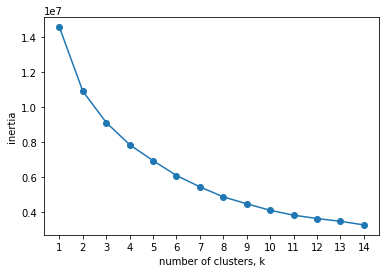

In [30]:
# kmeans 적정 cluster search
'''
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
ks = range(1,15)

inertias = []



for k in ks:

    model = KMeans(n_clusters=k)

    model.fit(feature)

    inertias.append(model.inertia_)

    

# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show()
'''


# H-cluster

In [28]:

from sklearn import datasets
import pandas as pd
labels = pd.DataFrame(cat_label)
labels.columns=['labels']
data = pd.concat([feature,labels],axis=1)

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(data,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = labels.as_matrix(columns=['labels']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()


ValueError: could not convert string to float: '스폰지/퍼프'

In [142]:
labels =cat_label.as_matrix(columns=['PD_S_NM'])
labels

array([nan], dtype=object)

In [ ]:
import numpy as np
def a(df_by_age_m):
    if df_by_age_m.ix['V1']< df_by_age_m.ix['M_V1']:
        return ((df_by_age_m.ix['V1']-np.min(df_by_age_m.ix['V1']))/(df_by_age_m.ix['M_V1']-np.min(df_by_age_m.ix['V1'])))*0.5
    else:
        return ((df_by_age_m.ix['V1']-np.min(df_by_age_m.ix['V1']))/(df_by_age_m.ix['M_V1']-np.min(df_by_age_m.ix['V1'])))*0.5+0.5
        
    # noise term prevents the zero division

In [ ]:

y = S.iloc[:,-1]
xy = MinMaxScaler(y)
xy.unique()

In [ ]:
S

In [ ]:
S_table=S.set_index(['ID','PD_S_NM']).unstack()
S_table.fillna('').ix[212:222, 808:817]

# Baseline model
∑rui∈Rtrain(rui−(μ+bu+bi))2+λ(b2u+b2i)

In [ ]:
# train test split

train_size = int(len(S) * 0.7)
test_size = len(S) - train_size
trainset, testset = np.array(S[0:train_size]), np.array(
    S[train_size:len(S)])


In [18]:
import pandas as pd

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
reader = Reader(rating_scale=(0, 1))

In [19]:
data = Dataset.load_from_df(result_df[['ID', 'PD_S_NM', 'V1_SCALED']], reader)

In [145]:
data.split(n_folds=3)

bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = surprise.BaselineOnly(bsl_options=bsl_options)

np.random.seed(0)
acc = np.zeros(3)
for i, (trainset, testset) in enumerate(data.folds()):
    algo.train(trainset)
    predictions = algo.test(testset)
    acc[i] = surprise.accuracy.fcp(predictions, verbose=True)
acc.mean()

Estimating biases using als...
FCP:  0.5308
Estimating biases using als...
FCP:  0.5330
Estimating biases using als...
FCP:  0.5353


0.53303098107347069

In [ ]:
 surprise.evaluate(algo,data)

In [18]:
import pandas as pd

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
reader = Reader(rating_scale=(0, 2))
data = Dataset.load_from_df(result_df[['ID', 'PD_S_NM', 'V1_SCALED']], reader)

In [19]:
# First train an SVD algorithm on the movielens dataset.

trainset = data.build_full_trainset()
algo =  surprise.SVD(n_factors=200, n_epochs=30)
algo.train(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])


/srv/poza/anaconda3/lib/python3.6/site-packages/scikit_surprise-latest-py3.6-linux-x86_64.egg/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


KeyboardInterrupt: 

# Collaborative Filter model


Neighborhood (User-based)CF & (Item-based)CF

In [ ]:
sim_options = {'name': 'msd'}
algo = surprise.KNNBasic(sim_options=sim_options)
surprise.evaluate(algo, data)

In [59]:
result_df1 = result_df.loc[:,['ID', 'PD_S_NM', 'V1_SCALED']]
result_df1 = result_df1.drop_duplicates()
result_df1.head()

,ID,PD_S_NM,V1_SCALED
0,457,우육,0.147279
7,14235,우육,0.024547
177,687,우육,0.392745
194,656,우육,0.098186
199,11736,우육,0.441838


In [82]:
result_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440831 entries, 0 to 3641078
Data columns (total 3 columns):
ID           1440831 non-null int64
PD_S_NM      1440831 non-null object
V1_SCALED    1440831 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 44.0+ MB


In [60]:
# realrating data conversion

import pandas as pd
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(result_df1[['ID', 'PD_S_NM', 'V1_SCALED']], reader)
print(data)

## SVD model

In [22]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Use the famous SVD algorithm.
algo = surprise.SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2344  0.2340  0.2338  0.2341  0.2333  0.2339  0.0004  
MAE (testset)     0.1695  0.1692  0.1689  0.1695  0.1688  0.1692  0.0003  
Fit time          95.47   95.36   95.17   95.31   95.03   95.27   0.15    
Test time         3.83    3.75    3.73    3.73    3.64    3.74    0.06    


{'fit_time': (95.46874594688416,
  95.35894227027893,
  95.16757082939148,
  95.30529713630676,
  95.02985382080078),
 'test_mae': array([ 0.16953474,  0.16923241,  0.16892058,  0.16947039,  0.16877823]),
 'test_rmse': array([ 0.23436931,  0.23396954,  0.23381972,  0.23414365,  0.23328821]),
 'test_time': (3.825024127960205,
  3.7545433044433594,
  3.734466791152954,
  3.7309300899505615,
  3.6409659385681152)}

# 모델검증

In [41]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import time
import datetime
import random

import numpy as np
import six
from tabulate import tabulate

from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

# The algorithms to cross-validate
classes = (SVD, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNBaseline,
           CoClustering, BaselineOnly, NormalPredictor)

# ugly dict to map algo names and datasets to their markdown links in the table
stable = 'http://surprise.readthedocs.io/en/stable/'
LINK = {'SVD': '[{}]({})'.format('SVD',
                                 stable +
                                 'matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD'),
        'NMF': '[{}]({})'.format('NMF',
                                 stable +
                                 'matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.NMF'),
        'SlopeOne': '[{}]({})'.format('Slope One',
                                      stable +
                                      'slope_one.html#surprise.prediction_algorithms.slope_one.SlopeOne'),
        'KNNBasic': '[{}]({})'.format('k-NN',
                                      stable +
                                      'knn_inspired.html#surprise.prediction_algorithms.knns.KNNBasic'),
        'KNNWithMeans': '[{}]({})'.format('Centered k-NN',
                                          stable +
                                          'knn_inspired.html#surprise.prediction_algorithms.knns.KNNWithMeans'),
        'KNNBaseline': '[{}]({})'.format('k-NN Baseline',
                                         stable +
                                         'knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline'),
        'CoClustering': '[{}]({})'.format('Co-Clustering',
                                          stable +
                                          'co_clustering.html#surprise.prediction_algorithms.co_clustering.CoClustering'),
        'BaselineOnly': '[{}]({})'.format('Baseline',
                                          stable +
                                          'basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly'),
        'NormalPredictor': '[{}]({})'.format('Random',
                                             stable +
                                             'basic_algorithms.html#surprise.prediction_algorithms.random_pred.NormalPredictor'),
        'ml-100k': '[{}]({})'.format('Movielens 100k',
                                     'http://grouplens.org/datasets/movielens/100k'),
        'ml-1m': '[{}]({})'.format('Movielens 1M',
                                   'http://grouplens.org/datasets/movielens/1m'),
        }



In [42]:
# set RNG
np.random.seed(0)
random.seed(0)
kf = KFold(random_state=0)  # folds will be the same for all algorithms.

In [ ]:
table = []
for klass in classes:
    start = time.time()
    out = cross_validate(klass(), data, ['rmse', 'mae'], kf)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    link = LINK[klass.__name__]
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    mean_mae = '{:.3f}'.format(np.mean(out['test_mae']))

    new_line = [link, mean_rmse, mean_mae, cv_time]
    print(tabulate([new_line], tablefmt="pipe"))  # print current algo perf
    table.append(new_line)

header = [LINK[dataset],
          'RMSE',
          'MAE',
          'Time'
          ]
print(tabulate(table, header, tablefmt="pipe"))
pritn(for klasss in class start=time.time(), out 

|:----------------------------------------------------------------------------------------------------------------------------------|------:|------:|:--------|
| [SVD](http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD) | 0.234 | 0.169 | 0:02:11 |
|:----------------------------------------------------------------------------------------------------------------------------------|------:|------:|:--------|
| [NMF](http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.NMF) | 0.238 | 0.155 | 0:02:13 |
|:-----------------------------------------------------------------------------------------------------------------------|------:|------:|:--------|
| [Slope One](http://surprise.readthedocs.io/en/stable/slope_one.html#surprise.prediction_algorithms.slope_one.SlopeOne) | 0.233 | 0.173 | 0:01:22 |
Computing the msd similarity matrix...
Computing the msd simil

NameError: name 'dataset' is not defined

# Grid Search
Tune algorithm parameter with gridsearchCV.
SVD

In [24]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

In [30]:
param_grid= {'n_epochs':[5,10],'lr_all':[0.002,0.005],'reg_all':[0.4,0.6],'n_factors':[100,200,500,1000]}
gs = GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])
'''###<bsl and sim option tuning>###
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [1, 2]},
              'k': [2, 3],
              'sim_options': {'name': ['msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False]}
              }
              '''

KeyboardInterrupt: 

In [ ]:
good = pd.DataFrame.from_dict(gs.best_params)
good

# Compare models
## Knnbasic VS SVD
CV train test : 7:3

In [62]:
from __future__ import (absolute_import, division, print_function,             
                        unicode_literals)                                      
import pickle
import os

import pandas as pd

from surprise import SVD
from surprise import KNNBasic
from surprise import Dataset                                                     
from surprise import Reader                                                      
from surprise import dump
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split


In [ ]:
# SVD 랑 Knn 비교 해보자 dump로 저장
algo_svd = SVD()                                                       
algo_knn = KNNBasic()
trainset,testset = train_test_split(data, test_size=.25)
algo_svd.fit(trainset)                             
predictions_svd = algo_svd.test(testset)
    
algo_knn.fit(trainset)
predictions_knn = algo_knn.test(testset)
    
rmse(predictions_svd)
rmse(predictions_knn)                                                                           

[Prediction(uid=19762, iid='즉석 죽/스프/누룽지', r_ui=0.27419354838709675, est=0.20938569347027025, details={'was_impossible': False}),
 Prediction(uid=9695, iid='여성화장품', r_ui=0.087518647439085, est=0.034533798562947027, details={'was_impossible': False}),
 Prediction(uid=12905, iid='부드러운복숭아', r_ui=0.0, est=0.012075575148378537, details={'was_impossible': False}),
 Prediction(uid=18723, iid='일반화장품', r_ui=0.19347568208778165, est=0.15491394288824467, details={'was_impossible': False}),
 Prediction(uid=11648, iid='젓갈류', r_ui=0.0, est=0.23033043280310839, details={'was_impossible': False}),
 Prediction(uid=9862, iid='소금', r_ui=0.0, est=0.13472711036622265, details={'was_impossible': False}),
 Prediction(uid=11275, iid='대형테넌트', r_ui=0.19015151515151518, est=0.097989178973592495, details={'was_impossible': False}),
 Prediction(uid=6703, iid='랩/호일', r_ui=0.5399069277372903, est=0.18572251212701074, details={'was_impossible': False}),
 Prediction(uid=17386, iid='가정용화장지', r_ui=0.0, est=0.094192667695

In [67]:

df_svd = pd.DataFrame(predictions_svd, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df_knn = pd.DataFrame(predictions_knn, columns=['uid', 'iid', 'rui', 'est', 'details'])    

df_svd['err'] = abs(df_svd.est - df_svd.rui)
df_knn['err'] = abs(df_knn.est - df_knn.rui)

In [84]:
df_svd.head()

,uid,iid,rui,est,details,err
0,19762,즉석 죽/스프/누룽지,0.274194,0.209386,{'was_impossible': False},0.064808
1,9695,여성화장품,0.087519,0.034534,{'was_impossible': False},0.052985
2,12905,부드러운복숭아,0.000000,0.012076,{'was_impossible': False},0.012076
3,18723,일반화장품,0.193476,0.154914,{'was_impossible': False},0.038562
4,11648,젓갈류,0.000000,0.230330,{'was_impossible': False},0.230330


In [69]:
df_knn.head()

,uid,iid,rui,est,details,err
0,9223,대석자두,0.000000,0.138847,"{'actual_k': 40, 'was_impossible': False}",0.138847
1,10271,어묵,0.350240,0.154027,"{'actual_k': 40, 'was_impossible': False}",0.196213
2,116,딸기,0.000000,0.159697,"{'actual_k': 40, 'was_impossible': False}",0.159697
3,1987,순면생리대,0.000000,0.127941,"{'actual_k': 40, 'was_impossible': False}",0.127941
4,5302,브랜드,0.400463,0.155688,"{'actual_k': 40, 'was_impossible': False}",0.244775


In [ ]:
df_knn[df_svd.err >= 3.5]

In [70]:
# Well... Not much better.
# Now, let's look at the predictions of SVD on the 10 worst predictions for KNN
df_svd.iloc[df_knn.sort_values(by='err')[-10:].index]

,uid,iid,rui,est,details,err
213889,8327,회,0.000000,0.164280,{'was_impossible': False},0.164280
57782,17896,일반화장품,0.044790,0.069017,{'was_impossible': False},0.024227
111525,15625,기능성건강음료,0.550000,0.166373,{'was_impossible': False},0.383627
147611,4660,일반닭,0.000000,0.130303,{'was_impossible': False},0.130303
260727,4613,오이,0.000000,0.020058,{'was_impossible': False},0.020058
260806,12756,요리용치즈,0.000000,0.119499,{'was_impossible': False},0.119499
14856,8566,소시지,0.000000,0.049977,{'was_impossible': False},0.049977
184603,13078,콜라,0.000000,0.021013,{'was_impossible': False},0.021013
92287,4128,무,0.107056,0.129184,{'was_impossible': False},0.022128
188459,11045,플라자,1.000000,0.344632,{'was_impossible': False},0.655368


<IPython.core.display.Javascript object>


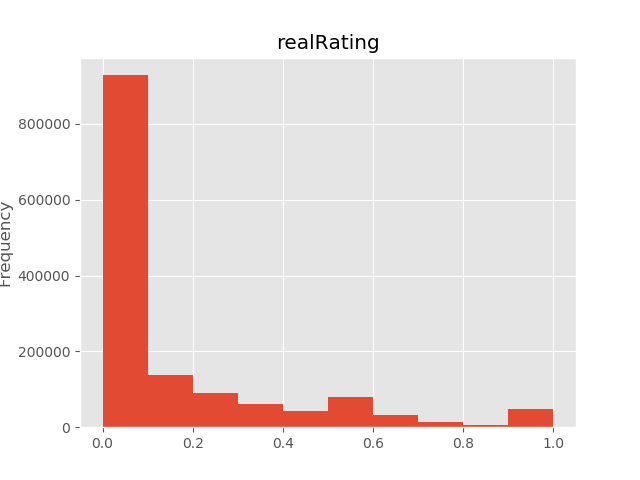

In [78]:
result_df1.V1_SCALED.plot(kind='hist',title='realRating')

<IPython.core.display.Javascript object>


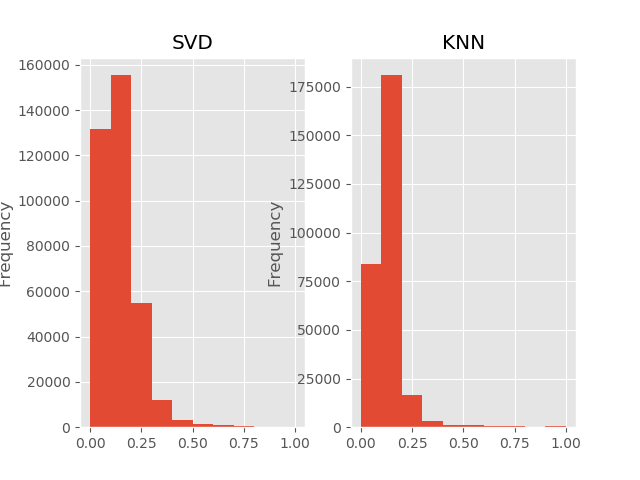

In [79]:
# How different are the predictions from both algorithms ?
# Let's count the number of predictions for each rating value

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.style.use('ggplot')

figure, (ax1, ax2) = plt.subplots(1, 2)

df_svd.est.plot(kind='hist', title='SVD', ax=ax1)
df_knn.est.plot(kind='hist', title='KNN', ax=ax2)
# As expected, one of the drawbacks of the NN algorithms is that their predictions are often
# quite concentrated around the mean. The SVD algorithm seems more confortable predicting extreme rating values.

In [86]:
# Question: when a user has rated only a small number of items (less than 10), which algorithm
# gives the best predictions on average?

def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
df_knn['Iu'] = df_knn.uid.apply(get_Iu)
df_svd['Iu'] = df_svd.uid.apply(get_Iu)

df_knn[df_knn.Iu < 10].err.mean(), df_svd[df_svd.Iu < 10].err.mean()

(0.16046715817121984, 0.11447655463389025)

# Pick Top_n

In [89]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n
''' 
그리드서치 적용해보자
gs = GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
gs.fit(data)
# First train an SVD algorithm on the movielens dataset.
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)
'''
top_n = get_top_n(predictions_svd , n=5)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

19762 ['즉석 죽/스프/누룽지', '공예용품', '접착용품', '유아용품', '찐빵']
9695 ['영컨셉', '낙지', '트랜디', '컵라면', '시즌모']
12905 ['고농축표백제', '대형테넌트', '생리대', '국산돼지앞다리', '냉장면']
18723 ['슬리퍼', '맥시코산돼지고기', '이지캐주얼', '용기리필커피', '남성묶음양말']
11648 ['쿠션류', '유아두유', '수전', '남성양말선물세트', '외부액세서리']
9862 ['여아내의', '팬시스티커', '유니섹스', '주유소', '여성편집']
11275 ['대형테넌트', '무선조종', '스트리트', '일반주방세제', '간장']
6703 ['살구', '즉석누룽지', '유아동승용물', '덧신기획', '팬시스티커']
17386 ['삭스', '미스트', '칼라용염색약', '슬리퍼', '손찜만두']
1439 ['편지/카드', '구두시즌', '욕실용품', '유아복', '미역']
14746 ['의약외품음료', '대형테넌트', '스카프(특정)', '치약', '수입비스켓']
1301 ['거울', 'Taste5.1', '친환경과일세트', '브랜드성인침구3', '미역특산물']
13177 ['냉동육가공품', '구두', '아동방꾸미기', '신생아/유아', '푸드코트']
5861 ['냉장핫도그/핫바류', '금강그룹', '비지니스군', '양말(특정)', '주방용청소세제']
16238 ['영양바', '냉장밥/죽', '명태', '음용식초', '일반램프']
6240 ['global 편집샵', '모자(특정)', 'L/C 아동복', '여성헤어액세서리', '린스/컨디셔너']
16288 ['립글로즈/틴트', '동양전통주', '아이라이너', '아이', '국산꽃게']
7608 ['신생아/유아', 'BYETTOL', '넥타이(특정)', '샴푸/탈취제', '장난감']
6552 ['냉동규격날치알', '모둠회', '시즈닝견과', '기름종이', '한과']
3978 ['커튼', '특수전지', '머렐', '호주산와규', '전통과자']
1

3243 ['좌식의자', '메이크업베이스/프라이머', '메탈미용소도구', '봉투류', '헨리코튼상품군']
8639 ['주전자', '자동차보수용품', '우렁이', '유아동가구', '창작용품']
13922 ['L/C 아웃도어', '트랜디']
13307 ['냉동만두', '체/바구니', '수입소스', '비엔나소시지', '깻잎']
14411 ['홍삼세트', '식용유세트', '커피세트', '홍합', '연어통조림']
6944 ['단기행사(스포츠)', '파티용품', '미시캐주얼하의', '포모사', '유아용품']
4704 ['홀빈원두커피', '포장/이사용품', '의약외품음료', '친환경김치채소', '주방잡화']
1164 ['남성슬리퍼', '액세서리브랜드', '케익류', '수입브릿지', '주거청소세제']
2932 ['생필(부대)', '건강식품', '밥류', '올리브핫스텁', '간편과일']
9488 ['갓', '한우냉장선물세트', '마담/어덜트아우터', '회', '서식지']
10321 ['음식물봉투', '갤럭시', '흑미류', '여성편집', '뉴발란스아울렛']
4768 ['임산부케어', '등산화', 'KKD', '면류', '진캐주얼']
13356 ['빠뮤', '헤어에센스', '프리미엄샴푸', '가공조미료', '밥류']
5768 ['음료용컵', '식당가 아이스크림', '여아내의', '쿨캐주얼', '수입주방']
12227 ['푸드코트', '배드민턴용품', 'ANDZ', '여성편집', '아동행사']
679 ['PB돼지고기', '내의', '넥타이(특정)', '란제리', '한식델리']
16455 ['기타베이커리', '기능성물티슈', '바디보습', '온라인스트리트', '훈제/구이오징어']
6187 ['메탈호스', 'PB토마토', '와이퍼', '내의기획', '스케치북/종합장']
15931 ['돈,닭,치즈육포', '배기타', '캐릭터과자', '서식지', '봉제인형']
430 ['T-SHOP', '브라', '멸치특산물', '어덜트', '케익류']
8921 ['기타향신료', '립글로즈/틴트', '

4994 ['남성베이직상의', '가드닝세트', '국산꽁치', '아동내의 기획', '란제리행사']
14665 ['믹싱볼/양푼', '남성이지캐주얼상의', '스포츠의류', '3분요리류', '수입초콜릿']
2715 ['스포츠양말', '애견간식', '홍삼즙', '일반수박', '치약']
9312 ['밤', '애견건식사료', '기타일반문구/사무용품', '스포츠의류', '이지캐주얼']
9050 ['스카프(특정)', '크림/연유', '감', '국산돼지삼겹살', '가지']
9595 ['남성헤어케어', '유아세제', '유명산지수박', '패브릭욕실매트', '주거청소세제']
10304 ['갤럭시', '엘레강스', '트랜디', '영 트렌디', '아디다스의류']
9517 ['거울', '종이/패브릭수납함', '수영복', '수입육', 'N.B']
11266 ['프리미엄캔디', '쿨캐주얼', '직수입', '국산주방', '넥타이(특정)']
1980 ['애견건식사료', '식이섬유음료', '모자(특정)', '섬유유연제/향기지속제', '아이섀도우']
8092 ['후크형 필기구', '파인트', '볼쵸코렛', '기능성요구르트', '나이키화']
13734 ['라면(소형컵)', 'global SPA', '식당가 한식', '색조 화장품']
15978 ['클럽캠브리지', 'K2', '올리브핫스텁', '멀티탭', '펜']
734 ['수입냉동선물세트', '일반교육', '국산참조기', '판초콜릿', '양말(특정)']
12614 ['남성내의', '브랜드', '란제리', '느타리버섯', '랩/호일']
1945 ['여주', '구색양채', '일반껌', '탈취제', '라면']
323 ['식당가 한식']
2645 ['손수건(특정)', '파리모기살충제', '금강그룹', '스카프(특정)', '멸치류']
14771 ['한우부산물', '자두', '즉석반찬원부재료', '포도', '기타캠핑용품']
4105 ['홈웨어', '비지니스군', '장식소품', '숙면', '생필(부대)']
6197 ['일반네일/케어류', '드럭스토어', '수영복'

17571 ['슈즈행사', '패션인형', '키즈', '팬시용품', '국산대구']
862 ['실내DIY용품', '일반오리', '수입냉장고', '양말(특정)', '김류']
2915 ['기능성음료선물세트', '냉장조리원부재료', '전통/한방차', '곡물/견과차', '음용식초']
9126 ['네셔널', '스트리트', '일반미', 'global SPA']
5945 ['어반스타일', '냉동피자', '원물가루', '일반완구', '위스키']
14142 ['헤어세팅기', '직수입', '숙녀고정행사', '립', '국산도자기']
9804 ['명품오디오', '양말(특정)', '구두단기행사', '금강그룹', '영스트리트']
7534 ['색연필', '호주산소토시살', '아동놀이시설', '수입잡화', '완구']
1111 ['톳', '반건제수생선', '춘장', '현미류', '국물용멸치']
5476 ['페루청포도', '활어초밥', '냅킨', '곶감', '건강미용차']
8911 ['global SPA', '보네스빼', '포장김치', '다이소', '과일음료']
5754 ['핑', '여성이지캐주얼상의', '수산캔', '트랜디', '빈폴아웃도어']
13312 ['일반완구(직배)', '장신', 'SM TOWN', '건과세트', '꼬치 타입']
3399 ['즉석구이김류', '프리미엄진', '일반침대(에이스)', '한과(세트행사)', '수영복']
2732 ['헬스건강', '부각', '찌개/탕(냉장)', '잡곡기타', '무인양품']
295 ['수입소형가전', '구색양채', '식당가 일식', '냉동규격전감', '두부류']
10023 ['매일통상', '블랙야크', '생필(부대)', '형광램프', '아이웨어']
18860 ['망사양말', '캐릭터 여화', '랩/호일', '보네스빼', '다이소']
3631 ['주방단기행사', '수입소형가전', '치간칫솔', '농산단기행사', '자동차방향제']
4517 ['씨없는수박', '버섯모둠', '달러존', '유아동승용물', '슈퍼푸드잡곡류']
13695 ['뚝배기', '액

16154 ['병맥주(대)', '취미/DIY', '식당가 일식', '믹스넛', '초콜릿바']
13624 ['라이터', '타미힐피거상품군', '스마트폰 액세서리(구전산소품)', '이지캐주얼', '직수입']
2182 ['스타일리쉬', '수입면류', 'TGIF', '진캐주얼', '일회용품']
8270 ['세탁건조대', '쿠션', '유아기타간식', '유아음료', '아동캐주얼']
3260 ['면봉/화장솜', '대형테넌트', '비지니스군', '페이셜클렌저', '브랑제리']
17234 ['캐주얼샌들', '냉동규격패류', '피망', '상온드레싱', '거실화']
2904 ['분무기', '호주산목초비육', '호주산곡물비육', '형광램프', '펜']
3214 ['계절카시트', '수입캐주얼', '에스프레소', '칠레블루베리', '바쏘']
11020 ['선크림류', '즉석볶음행사', '남성내의', '상온드레싱', '샤워헤드']
4795 ['대구전감', '간이의자', '세탁건조대', '기능성소품', '갤럭시']
14203 ['수입냉동고등어', '형광램프', '프로모션', '북미레몬', '수입냉장음료']
7307 ['싸인펜', '관상어', '미시', '찰현미류', '관상어용품']
451 ['현미', '숙녀고정행사', '건강식품(홍삼)', '카페트', '뷰티상품']
6402 ['온라인 비스켓', '씨없는수박', '준보석브랜드', '비지니스군', '김밥재료세트']
7529 ['워머', '유아토들러아우터', '콜렉션인형', '유아토들러상의', '남주니어양말']
2082 ['골프장갑', '국산차', '영밸류', '숙면', '메탈']
9540 ['Taste5.1', '세차케미칼류', '기능성요구르트', '유아기저귀', '떡볶이']
9588 ['스테이크', '기능성웰빙돼지고기', '일반떡']
4063 ['컵얼음', '헤어에센스', '판초콜릿', '봉지캔디', '컵커피우유']
11857 ['남성향수', '기능성음료선물세트', '한우특수부위', '기초화장품', '워터스포츠용품']
15805 ['시즌침

2954 ['삼치', '냉동만두', '감', '굴', '아이스크림케이크']
13424 ['주니어아우터', '미술용품', '봉제인형', '내의', '바디스킨케어']
16110 ['고정행사(스포츠)', '패션내의', 'L/C골프의류', '브랑제리', '비지니스군']
6985 ['캔디류', '여성양말덧신', '키즈', '의약외품', '영스트리트']
19755 ['남성향수', '일반완구', '안주용육포류', '캐릭터 남화', '스마트폰 액세서리(구전산소품)']
3474 ['수입A/V', '염모제', '보석', '비지니스군', '크림/밤/오일']
9322 ['수입조미료', '냉동규격새우', '에너지절약용품', '과일향탄산(중)', '간편양념']
12061 ['닭/오리양념육', 'global 편집샵', '패션내의', '기초 화장품', '바쵸코렛']
7403 ['화분', '배드민턴용품', 'Local근대', '아동실내덧신', '덧신기획']
840 ['내의기타행사', '란제리 기획', 'N/B골프의류', '홀빈원두커피', '숙녀고정행사']
7811 ['기타주방일회용품', '어묵', '당면', '쌈채소류', '공병/공박스']
4818 ['헤어왁스', '부세조기', '훈제/구이오징어', '굴비류', '바디클린져']
10377 ['사이다', '콜라', '국산맥주']
1559 ['커피/티용품', '포장/이사용품', '꼬막', '캐슈넛', '회재료']
7239 ['기타구기용품', '아웃도어용품', '기타기능건강', 'PB돼지고기', '브랜드']
3695 ['미국적포도', '브라', '바스켓', '프리미엄초콜릿', '베이스']
17851 ['메탈', '방충제', '스카프(특정)', '국산ACC', 'global 편집샵']
4408 ['슈즈행사', '음식물봉투', '유니섹스', '호주산와규', '만두']
310 ['손수건(특정)', '닥스', '컬럼비아', '샴푸/린스세트', '가방']
5904 ['미니도시락', '빠뮤', '곡물스낵', '낙지', '반찬류행사']
5403 ['유럽산돼지

9805 ['옛날과자', '패션내의', '밥류', '일반생리대', '브랜드']
19619 ['조리기구/소모품', '벌크젓갈', '굴비류', '양말(특정)', '건강식품(비타민)']
16814 ['티백/드립원두커피', '식이섬유음료', '분말표백제', '쉘초콜릿', '양갱']
16645 ['바스켓', '수입초콜릿', '초콜릿바', '국산초콜릿', '선글라스(특정)']
3153 ['캠핑소품', '플레이세트', '아동방꾸미기', '유아동가구', '기타냉동과일류']
14065 ['시트지', '과자선물세트', '조립/프라모델', '채소음료', '파리모기살충제']
4181 ['신발수납용품', '종이/패브릭수납함', '샤워타월', '즉석.스넥(매장)', '나이키화']
18508 ['시즌침구', '자동차제설용품', '슈퍼푸드잡곡류', '종합비타민', '아스파라거스']
9052 ['식이섬유음료', '찐빵', '국산초콜릿', '패션내의', '프라이팬']
18591 ['전어', '즉석국/찌개', '고무장갑', '국산돼지목심', '갈치']
9435 ['이지캐주얼', '식당가 일식', '식당가 한식', '커리어', '위생세제']
8311 ['아동행사', '양식', '김자반', '홈메이드믹스', '고당도바나나']
18655 ['아동시즌슈즈', '아디다스의류', '차음료', '분말세제', '젤리']
15704 ['캔너트', '명품남성', '스포츠화', '빗자루/쓰레받이', '수입면류']
5071 ['그라스', '식기단기행사', '연두부류', '국산ACC', '만두']
6942 ['블럭', '생필(부대)', '일반생리대', '찐빵', '미역']
15165 ['여성베이직상의', '단일비타민', '저장병', '스포츠양말', '소품베개']
16977 ['고양이습식사료', '발판', '장난감', '오일/첨가제', '드럭스토어']
518 ['알타리무', '반찬통/밀폐용기', '반건가자미', '겨자/고추냉이', '분말카레짜장']
6318 ['가정간편식', '캡슐원두커피', '냉동튀김', '햄버거',

18563 ['파티/팬시', '거봉포도', '교구류', '봉지라면', '다이소']
22 ['건강베개', '컨셉편집', '옴스', '비지니스군', '캔들디퓨져']
10499 ['전자지능개발', '육가공캔', '만들기용품', '푸드하우스', '채소병통조림']
577 ['기능성미', 'N/B골프의류', 'L/C골프의류', '스타킹(특정)', '란제리']
14986 ['명태알', '세탁건조대', '향초', '디퓨저', '찌개/탕(냉장)']
6992 ['특수램프', '비지니스군', '건미역', '스테이크', '파인애플']
11055 ['남성향수', '컬처캐주얼', '지방스넥(부대)', '식당가 한식', '서적']
7490 ['여아내의', '서식지', '데스크정리용품', '자동차방향제', '나이키의류']
1289 ['우리골프', '에어컨', '골프용품', 'TGIF', 'N.B']
14841 ['비지니스군', '스포츠화', '올젠상품군', 'global SPA', '기초 화장품']
19516 ['튜브/컵아이스', '오일/첨가제', '호주산목초비육', '사각햄', '한우규격']
14336 ['Knit & Knot', '국산주방', '비지니스군', '캐주얼화', '라면(대형컵)']
2798 ['모근/한방샴푸', '농산단기행사', '생선', '전문베이커리', '브랜드샵']
965 ['수예커버', '종합비타민', '드럭스토어', '새우,홍합', '의류수납용품']
13594 ['요리', '도마', '내의기획', '아디다스의류', '국산갈치']
6991 ['샴푸/탈취제', '컵밥류', '호주산흑소', 'global 편집샵', '콘아이스']
6709 ['혈행개선', '구강청결제', '사무용지', '컵라면', '어묵']
6655 ['지오송지오', '나이키화', '숙취해소음료', '패밀리레스토랑', '블루베리(기타)']
9228 ['한라봉', '카테고리킬러', '포도기타', '어린이초코렛', '드럭스토어']
13350 ['유럽산돼지고기', '발가락양말', '찌개/탕(냉장)', '하드캔디

3188 ['식탁', '캐릭터 남화', 'L.B', '즉석김치류', '컨템포러리']
3013 ['노스페이스', '냉동베리류', '젤리', '즉석김치류', '즉석밥류']
7054 ['건강보조식품세트', '유아용화장품', '에센스/세럼', '액세서리브랜드', '반건가자미']
2413 ['아이스음료', 'N/B골프의류', '샌드빵', '여성내의', '트랜디']
10060 ['마늘', '콘스낵', '바아이스크림', '과채혼합음료', '혼합탄산']
7526 ['지이크', '이지캐주얼', '영캐주얼', '명품잡화']
15126 ['컴퓨터게임소프트웨어', '컬럼비아', '헨리코튼상품군', '식당가 일식', '과일향탄산(중)']
13262 ['기타전자완구', '모둠버섯', '아울렛', '신생아/유아', '나이키의류']
17352 ['생리대', '수입ACC', '스포츠의류', '일식델리']
14698 ['가공메추리알', '커피크리머', '부침가루', '삼계탕용닭', '볶음탕용닭']
17943 ['여아내의', '란제리 기획', '주니어', '일반샴푸단품', '타운캐주얼']
13817 ['라면', '영밸류 캐주얼', '일반생리대', '일회용품', '수입소스']
14854 ['국산병어', '콩류', '슈퍼푸드잡곡류', '미시', '민속주']
18995 ['엠유스포츠', '과메기', '국산굴비', '브랜드도자기', '국산도자기']
6744 ['장우산', 'BAT', '수박', '전통차음료', '대파']
2804 ['패션갤러리움', 'F/F기타', '유명산지수박', '에너지절약용품', '영트랜디']
2129 ['수      저', '올젠상품군', '국산주방', '이지캐주얼', '장갑(특정)']
9977 ['에스프레소', '영 트렌디', '패션내의', 'global 편집샵', '컬처캐주얼']
19713 ['명품기타', '캔너트', '네셔널', '탁주', '선글라스(특정)']
18436 ['빗/이발기', '루이까스텔', '타이즈', '모자(특정)', '여성내의']
16622 ['주니어스포

2993 ['올리브핫스텁', '국산냉장고.세탁기', '시니어', '국산도자기', '수입면류']
15625 ['기능성건강음료', '슈퍼푸드잡곡류', '페이셜팩류', '남성용스킨케어류', '진캐주얼']
4992 ['페이셜팩류', '금강그룹', '캐릭터 여화', '화장솜/면봉', '가정용화장지']
3347 ['아이라이너', '마리메꼬', '드럭스토어', '브랑제리', '패션내의']
10860 ['포장연어', '혼합견과', '참기름/들기름', '롤티슈', '국산돼지갈비']
18909 ['수입맥주(캔)', '라면(소형컵)', '일반스낵', '바', '커피우유']
7961 ['PB돼지고기', '이지캐주얼', '교구류', '즉석오징어', '네셔널']
11679 ['크리스탈', 'NB 여화', 'L/C 아웃도어', '말이김밥', '비지니스군']
691 ['감귤기타', '덧신기획', '남성내의', '수입잡화', '멀티탭']
10544 ['니나리찌', '남성내의', '천도복숭아', '찐빵', '일반닭']
16280 ['그라스', '에스프레소', '수입캐릭터', 'N/B골프의류', '브랑제리']
17972 ['베이비푸드', '즙용샐러드채소', '쿨캐주얼', '구색양채', '수입화']
12065 ['컬처캐주얼', '컵라면', '액체세제', '지방스넥(부대)', '간편과일']
8370 ['카시트', '핸들커버', '주거청소세제', '논우렁살', '여성화장품']
13455 ['국산초콜릿', '얼음', '일반우유', '메론', '파이']
17910 ['커피숍', '비타민음료', '수입ACC', '혼합탄산']
5166 ['제철반찬', '씨없는수박', '포모사', '국산기타구색생선', '액세서리행사']
2487 ['기타베이커리', '브랑제리', '면류', '수입 아동복', '패션갤러리움']
3712 ['팬텀골프', '보석', '닥스', '폴로상품군', '욕실용품']
3692 ['란제리행사', '디자이너', 'global SPA', '식당가 한식', '캐릭터 여화']
3835 ['교복', '

14543 ['남성묶음양말', '원물형태햄', '샌드', '중식', '느타리버섯']
12644 ['남성이지캐주얼상의', '바캉스슈즈', '동양전통주', '배기타', '미용비누']
4046 ['일회용젓가락/숟가락', '스포츠화', '기능성껌', '수산통조림', '초밥']
17663 ['고춧가루', '닭윗날개(봉)', '연두부류', '포장새우살', '복숭아']
18273 ['국산주방', '스타킹(특정)', '영 트렌디', '스트리트', '식당가 한식']
265 ['누셀렉트샵', '캡슐원두커피', '한차', '컬처캐주얼', '민속주']
2107 ['나이키골프', '처방사료', '빈폴아웃도어', '유니섹스', '사진관']
507 ['한실침구', '비지니스군', '볶음탕용닭', '꽁치고등어통조림', '삼계탕용닭']
16013 ['기타분말류', '탈취제', '프로모션', '아동놀이시설', '냉장장류']
19170 ['500ml이하']
2679 ['포숑', '일반떡', '위생세제', '한식델리', '청과']
6423 ['모과', '기능성음료선물세트', '고양이건식사료', '냉동규격패류', '스포츠양말']
8939 ['특수램프', '찰현미류', '수입면류', '건강미용차', '3분요리류']
8094 ['미니자동차', '스카프(특정)', '수입소형가전', '편지/카드', '면류']
5984 ['냉동부침/구이', '보조조리도구', '홈아이스']
15177 ['과자선물세트', '안주류', '아디다스의류', '빈폴상품군', '수입소형가전']
13258 ['기초 화장품', '캔커피(NB)', '아이스커피']
13782 ['대구', '꽁치고등어통조림', '마른김', '혼합견과', '섬유유연제/향기지속제']
16003 ['규격소스류', '냉동기타규격생선', '캠핑키친용품', '조립/프라모델', 'L/C 아웃도어']
1177 ['멸치류', '호주산곡물비육', '수입주방', '비엔나소시지', '과채혼합음료']
13687 ['코스튬/롤플레잉', '여아드레스 및 소품', '안주류', '비지니스

13799 ['용기껌', '일반완구', '랍스터', '노스페이스', '숙녀고정행사']
6378 ['테이블장식용품', '3단우산', '밥류', '유아브랜드', '식당가 양식']
2505 ['유아브랜드', '드레싱', '김밥/롤', '컵라면', '식당가 한식']
18322 ['풋케어용품', '포장젓갈', '과메기', '천연세정제', '드럭스토어']
8005 ['앨범', '오일/첨가제', '구강청정제', '황태채', '한과']
9955 ['등산화', '디자이너', '가정간편식', 'N/B골프의류', '타미힐피거상품군']
5676 ['쿠키케이크', '김선물세트', '분말카레짜장', '케첩', '메론']
7241 ['해열진통제', '여성이지캐주얼하의', '리빙박스', '드럭스토어', '김치']
7611 ['뉴발란스아울렛', '케익류', 'global SPA', '지방스넥(부대)', '식당가 일식']
19594 ['박스티슈', '바나나우유', '커피우유', '에스닉푸드', '과일향탄산(중)']
16221 ['다리미판', '싱크매트', '타이즈', '홍어회', '스타킹기획']
1691 ['호주산소설도', '빈폴골프', '갤럭시라이프스타일', '에스프레소', '디저트카페']
17297 ['스틱과자', '절임반찬', '보네스빼']
3872 ['영 트렌디', '건어물류', '국물용기라면', '수입주방', '망고']
10102 ['곶감/송이세트', '인라인스케이트', '보석', '숙녀고정행사', '국산ACC']
3016 ['캐릭터 남화', '캔들디퓨져', '밀레', '트리트먼트/팩', '스카프(특정)']
10518 ['기타오렌지', '골프용품', '폴로상품군', '선크림류', '복숭아']
4404 ['수영복', '쿨캐주얼', '넥타이(특정)', '비지니스군', '스카프(특정)']
11187 ['빈폴상품군', '인디안']
1454 ['드림플라자', '쿨캐주얼', '유원시설', '유아복', '식당가 일식']
6870 ['L/C 아웃도어', 'SPA', '마늘', '국산초콜릿', '샌

7531 ['세탁건조대', '행주', '일반램프', '프리미엄샴푸', '즉석국/찌개']
10466 ['황금향', '구색양채', '생굴', '초콜릿바', '기타바나나']
14989 ['액상치약', '봉투보증금', '진캐주얼', '어반캐주얼', '사이다(소)']
5749 ['빈폴골프', 'N/B골프의류', '아몬드', '스포츠화', '창작용품']
11526 ['접착제', '간편구색', '토종닭', '비엔나소시지', '과채혼합음료']
8445 ['주류', '구두단기행사', '커리어', '요리용치즈', '기초 화장품']
4033 ['한우특수부위', '수입껌', '활어초밥', '시즌행사', '해파리']
13245 ['단일비타민', '캐주얼양말', '소화제', '부침/튀김가루', '모근/한방샴푸']
6196 ['욕실수납용품', '유아동승용물', '마켓피자', '누들', '체리 기타']
902 ['우엉', '베이비스킨케어', '수입조미료', '로가디스그린', '수입고등어자반']
1902 ['레져시트/기타', '수입잡화', '타미힐피거상품군', '수입도자기', '직수입 골프의류']
18281 ['체리 기타', '슬라이스햄', '어묵', '샐러드', '건과일']
13123 ['페루기타포도', '유아토들러하의', '스마트폰 액세서리(구전산소품)', '뉴발란스아울렛', '파일/바인더']
10867 ['피혁브랜드', '제과,제빵', '영밸류 캐주얼', '봉투보증금', '팬티라이너']
906 ['엘레강스', '비지니스군', '한우앞다리', '스카프(특정)', '란제리']
19953 ['원물가루', '옴스', '일반간식류행사', '여성화장품', '일반화장품']
15427 ['디저트류', '밥류', 'L/C 아동복']
12835 ['홈웨어', 'L/C 아동복', '식당가 중식', '케익류', '유아복']
8726 ['단기행사(스포츠)', '시즌행사', '단기행사', '올리브핫스텁', '수입면류']
9670 ['파리/모기살충제', '전통/한방차', '기타캠핑용품', '유아용물티슈', '상

10946 ['즉석면류', '분말스프', '이지캐주얼', '메론', '콘아이스크림']
352 ['푸드코트', 'global SPA', '즉석볶음행사', '수입식품', '숙주나물']
10041 ['새송이버섯류', '생리대', '일반계란', '파이', '일반우유']
14367 ['여성헤어액세서리', '판초콜릿', '풋케어', '제모용품', '영캐주얼']
18809 ['젓가락/스푼', '품종차별화돼지고기', '주스(대)', '수입생물연어', '기능성우유(중)']
12864 ['신생아/유아', '호주산목초비육', '어린이음료', '무우', '쌈채소']
11773 ['타월', '아디다스의류', '스포츠의류', '스틱과자', 'global SPA']
15366 ['욕실수납용품', '프라이팬', '욕실소품', '파티용품', '미취학']
6979 ['남성잡화 ACC', '에센스/세럼', '국산돼지목심', '채소병통조림', '스카프(특정)']
113 ['홈웨어', '현미', '골프캐주얼', '복숭아', '수입소스']
13742 ['패션내의', '색조 화장품', 'global SPA']
922 ['우산', '페이셜팩류', '면봉/화장솜', '양말(특정)', '일반생리대']
13597 ['가스기기', '진캐주얼', '브랜드샵']
5331 ['남성벨트', '남주니어내의', '룸베이', '빗자루/쓰레받이', '세차도구']
6130 ['양말(특정)', 'L/C 아웃도어', '아동놀이시설', '어묵', '수입브릿지']
5706 ['초콜릿', '트랜디', '수입단기행사', '한우등심', '수입맥주']
662 ['HOT', '찰토마토', '뷔페레스토랑', '느타리버섯', 'NB돼지고기']
4780 ['물놀이용품', '브랜드도자기', '모둠초밥', '냉동열대과일', '기타기능건강']
10373 ['화장솜/면봉', '리빙박스', '브랑제리', '케익류', '음료식초']
2657 ['트랜디', '양말(특정)', '스포츠음료(중)', '스타킹(특정)', '수입소형가전']
2628 ['국산돼지갈매기

15795 ['치약', 'global SPA', 'L/C 아동복', '기능성웰빙돼지고기', '애호박']
9377 ['걸레/청소포', '다이소', '양과자류']
8223 ['피아노/악기', '팬시용품', '수입초콜릿', '분말조리식', '칠레청포도']
16380 ['아동묶음양말', '여성편집', '국물팩', '훈제,구이진미', '수입스낵']
12847 ['가정보수용품', '치약', '국산오징어', '다이소', '일반란']
12172 ['곡물/견과차', '망고', '고구마스낵', '푸딩/젤리', '기타온장조리']
2458 ['직수입 골프의류', '숙주나물', '용기리필커피', '컵라면', '수입식품']
10586 ['주방가위', '냉동튀김', '밥류', '일회용품', '묵']
11340 ['유아서적', '키덜트/콜렉션', '프리미엄파이', '캐릭터봉제', '애호박']
5318 ['수입브릿지', '네셔널', '디저트카페', '영스트리트', '란제리']
8523 ['아이', '수입ACC', '식당가 중식', '영밸류 캐주얼', '컴퓨터']
18691 ['수입스낵', '차음료', '핸드케어']
2223 ['곶감/송이세트', '여아내의', '한우곰거리', '오징어(중)', '패션내의']
3056 ['OUTDOOR+1', '허브/꽃차', '염모제', '욕실소품', '가정보수용품']
7471 ['캐주얼화', '굴비류', '전문베이커리', '국물봉지라면', '기능성우유']
14223 ['OUTDOOR+1', '수입소형가전', '공병', '스포츠화', '제과,제빵']
9615 ['뷰티상품', 'global SPA', '치킨', '커리어', '요리식초']
1824 ['수전', '이지', '비지니스군', '스포츠화', '밀폐용기']
2819 ['다용도상', '휴지통', '물만두', '빗자루/쓰레받이', '애호박']
15849 ['명품잡화']
9083 ['김영주골프', '전통도자기', '프리미엄스낵', '프리미엄파이', '직수입']
4873 ['온라인스트리트', '영스트리트', '영

9357 ['멸치류', '영 캐릭터', '식기단기행사', '냉장주스(소)', '식당가 양식']
8734 ['여행가방', '할로윈', '푸드엠파이어', '신생아/유아', '여성내의']
18285 ['우/양산(특정)', 'GR-8', '양과자류', '스포츠의류', '흰우유(대)']
14638 ['수입ACC', '묵', '이색버섯', '참치통조림', '샐러드']
9975 ['유아잡화', '파인트', '라푸마', '건강식품(홍삼)', '숙녀고정행사']
18657 ['서적', '영 캐릭터', '식당가 한식', '주스(소병)']
7736 ['4대 B/D', '기초 화장품', '음료', '토마토', '일반스낵']
12081 ['구두', '의류', '남성내의', '햄버거', '소시지']
8141 ['냉장커피음료']
12665 ['국물용소스', '단기행사(스포츠)', '국산주방', '스타킹(특정)', '현미']
8255 ['일반가공식품', '다이소', '4대 B/D']
13747 ['성인두유', '건강식품(비타민)', '키위', '워셔액', '일반스낵']
222 ['햄통조림', '자몽', '패션스티커', '식당가 한식', '사과']
363 ['한실침구', '수영복', '프랑코페라로', '아울렛(화장품)', '주방정리용품']
62 ['ANDZ', '수영복', '직수입 골프의류', 'L/C 아웃도어', '면류']
5774 ['기타회', '피혁브랜드', '봉지얼음', '키위', '밥류']
18231 ['영스트리트']
4734 ['코모도스퀘어', '시즌행사', '비지니스군', '프라이팬', '훈제오리']
16719 ['수입포도', '햄', '삼계탕용닭', '쿠키케이크', '바지락']
17783 ['남성내의', '건과기타', '빠뮤', '마스크팩', '바디클린져']
3943 ['헤지스골프', '레노마골프', '갤러리골프', '관상어', '울시']
7295 ['기타뿌리채소', '액세서리브랜드', '생리대', '조미도시락김', '냉동만두']
13947 ['캔디류', '일반생리대', '홈메

18953 ['단기행사', '콜라(중)', '말이김밥', '모나카', '영 캐릭터']
13428 ['가공우유']
16460 ['식기/물병', '비지니스군', '스넥(부대)', '액션피겨', '사각햄']
12159 ['캔커피(NB)', '폴로상품군', 'global SPA', '아이스크림', '일반흰우유']
510 ['스포츠화', '주방잡화', '쌈장', '일반교육', '국산꽃게']
1721 ['스카프(특정)', 'L/C 아웃도어', '모자(특정)', '욕실용품', '슈페리어']
15561 ['굴', '위생세제', '생수', '청과', '안주류']
2840 ['숙녀고정행사', '국산도자기', '영 캐릭터', '장갑(특정)', '전문베이커리']
3646 ['유기농채소']
6978 ['설탕', '주거청소세제', '즉석밥류', '티백차', '가지']
1438 ['수입화', 'L/C 아웃도어', '프라이팬', '스포츠화', '서양델리']
3967 ['김특산물', '파인트', '특산물행사', '컵', '양과자류']
10915 ['그라스', '유아복', '영스트리트', '지방스넥(부대)', '교자만두']
6676 ['단기행사(스포츠)', '스카프(특정)', '수입소형가전', '노지감귤', '숙녀고정행사']
18677 ['남성내의', '아디다스의류', '파슨스', '수입주방', '기능성껌']
16930 ['소파', '아디다스의류', '건과일', '봉지라면', '한우규격']
2449 ['규격김치', '제과,제빵', '수예소품', '스넥(부대)', '양과자류']
12640 ['영 캐릭터', '완구', '기타']
15612 ['각티슈/미용티슈', '치약', '감', '오렌지', '케이크']
1825 ['일반램프', '볶음탕용닭', '기타어류', '냉장면', '깻잎']
1632 ['캐릭터 남화', '영컨셉', '욕실소품', '넥타이(특정)', '손수건(특정)']
6193 ['측정용품', '김선물세트', '아동실내화', '이온음료', '국산초콜릿']
19801 ['절임반찬', '고추

12393 ['일반기획', '티백차', 'PB사과', '단감', '치킨']
1086 ['수영복', 'PECK Enoteca', '콘', '딸기우유', '나이키화']
3131 ['닥스', '쌈채소류', '식당가 양식', '바지락', '국산돼지삼겹살']
3983 ['손수건(특정)', '빈폴상품군', '식당가 일식', '제과,제빵', '일반섬유유연제']
12356 ['설탕', 'global SPA', '고추장']
19829 ['컵라면', '분말조리식', '봉지라면']
19403 ['셔츠단기행사', '포말정장', '국산골드키위', 'N/B골프의류', '수      저']
13181 ['국산주방', '국산ACC', '수예소품', '스포츠의류', '농산단기행사']
14644 ['컬처캐주얼', '기타레토르트', '국물봉지라면', '쿠키', '컵얼음']
3754 ['스트리트', '청과']
13078 ['서식지', '국산ACC', '뷔페레스토랑', 'L/C 아웃도어', '대석자두']
14880 ['커피']
5515 ['압력솥', '쟁반', '숙면', '테이프크리너', '소스']
19219 ['베이비푸드', '일반교육', '미니자동차', '로가디스', '나이키의류']
4750 ['스포츠화', '의약외품', '직수입 골프의류', '일반닭', '다이소']
152 ['수산단기행사', '기타베이커리', '수입화', '커리어', '유아복']
7166 ['떡볶이', '커피/초코우유', '케이크', '랩/호일', '과일맛우유']
12685 ['기타전통과자', '온장조리원부재료', '튜브아이스크림', '모나카', '용기껌']
2030 ['냄비', '유아복', '빠뮤', '슬라이스치즈', '세탁비누']
11636 ['칵테일소주', '샴푸/탈취제', '덴탈식품', '양과자류', '행사상품']
3427 ['한실침구', '기초A', '수입브릿지', '캐주얼화']
15329 ['마켓피자', '양과자류']
8557 ['수입잡화']
13476 ['양념소스', '연두부', '당근', '막걸리', '대파']

14885 ['수입잡화', 'L/C골프의류']
2780 ['타미힐피거상품군', '폴로상품군']
12982 ['골프장갑', '야구용품', '아몬드', '의약외품', '하드캔디']
17278 ['전기요/장판', '샤워헤드', '현미류', 'global SPA', '다이소']
3230 ['기타베이커리', '아이웨어', '기타생선', 'L/C 아웃도어', '양말(특정)']
3613 ['배드민턴용품', '멸치류', '식당가 한식', '아몬드', 'global SPA']
19613 ['농구용품', '스포츠화', '스포츠의류', '요리']
3766 ['N/B골프의류', '비지니스군', '스카프(특정)', '컬처캐주얼', '식당가 양식']
1635 ['트랜디', '단기행사', '울시', '유제품', '청과']
2517 ['기능성충전재', '호주산곡물비육']
9719 ['비지니스군', 'global SPA', '일반가공식품']
19398 ['조립/프라모델', '키즈', '비지니스군', '일식', '유원시설']
10932 ['과일음료']
9872 ['청백', '스타킹(특정)', '영 트렌디']
16517 ['L/C 아웃도어', '란제리', '햄', '멸치류', '커리어']
9079 ['빈폴상품군', '이지캐주얼', '캐주얼화', '스카프(특정)', '기타']
15124 ['라면(대형컵)', '어묵', '컵커피우유', '비빔면', '500ml이하']
8161 ['비지니스군', '네셔널', '디저트류', '제과,제빵', '한식델리']
8128 ['디즈니', '물엿/시럽', '지방스넥(부대)']
5927 ['파슨스', '보조조리도구', '장어류', '커피숍', '어반캐주얼']
207 ['캠브리지', '숙녀고정행사', '캐주얼피혁', '영 트렌디', '네셔널']
1989 ['빈폴아웃도어', '남성슬리퍼', '수입캐주얼', '노스페이스', '국산도자기']
19667 ['쿨캐주얼', '수입소형가전', '영스트리트', '건강식품(홍삼)']
3828 ['기타베이커리', '수입단기행사', '대

105 ['트리트먼트/팩', '냉장드레싱', 'global SPA', '배', '한식델리']
2632 ['르꼬끄골프', '엔젤리너스', '식당가 커피숍', '생선', '전문베이커리']
9307 ['틴스킨케어', '실내편의용품', '봉지라면', '브랜드란', '보네스빼']
4786 ['Local깻잎', '초콜릿바', '만두', '간식용치즈', '국산초콜릿']
7203 ['건강식품(비타민)', '일반화장품', '칫솔', '다이소', '보네스빼']
8788 ['르꼬끄골프', '어반캐주얼', '캐주얼화', '밥류', '콘스낵']
18055 ['고농축섬유유연제', '냉동튀김', '김밥/롤', '체/바구니']
13093 ['목욕타올', '용기껌', '가공계란', '친환경잡곡', '거실화']
18477 ['볶음용멸치', '과일통조림', '설탕', '국수', '뷔페레스토랑']
17050 ['PMI', '국산ACC', '컵커피우유']
8556 ['핸드워시/손세정제']
16122 ['고양이잡화', '미니도시락', '오일/첨가제', '고양이간식', '접착용품']
3969 ['채소']
16687 ['기초A']
18572 ['햄버거', '감자스낵']
9416 ['스포츠의류', '일식레스토랑']
19981 ['영스트리트']
12334 ['오징어(중)', '기타차']
1465 ['미시캐주얼원피스', '프랑코페라로', '영밸류 캐주얼', '멸치류', '치간칫솔']
23 ['패션내의', '서적']
13994 ['연두부류', '채소음료', '전통차음료', '국산돼지삼겹살', '한우우둔']
11131 ['아이웨어', '나이키화', '스포츠의류', '컬처캐주얼']
8890 ['라면(소형컵)', '도시락']
9538 ['팝캐스트', '욕실용품', '스포츠의류', '금강그룹', '나이키화']
116 ['어린이/액상요구르트', '양파', '일반흰우유']
8935 ['일반요구르트', '미용비누', '베이커리일반빵', '전문베이커리', '바아이스크림']
5330 ['스카프(특정)', '소동물용품', 'S

1896 ['블랙야크', '참외', '고추']
9006 ['지방스넥(부대)', '혼합탄산']
11503 ['캐주얼화', '스트리트']
18257 ['화이트와인', '방향제', '주방정리용품', '티백차', '국산초콜릿']
10106 ['진캐주얼', '스포츠화']
2331 ['영 트렌디', '오피스스티커', '서양델리']
17904 ['금강그룹', '식당가 한식', '랩/호일', '과일향탄산(중)']
4363 ['L/C 아웃도어', '스포츠화', '일반화장품']
10980 ['국산ACC', '부사', '디저트류', '브랜드샵', '청과']
13415 ['기초A', '일식델리', '색조 화장품', '시계', '무우']
11911 ['스트리트']
9461 ['수입소형가전', '지방스넥(부대)', '수입주방', 'L/C 아동복', '서양델리']
49 ['비지니스군', '수입의류', '스트리트', '수입 아동복', '액션피겨']
3276 ['한식']
7095 ['농산단기행사', '스포츠의류', '냉장장류', '보네스빼', '베이컨']
12315 ['진캐주얼']
3062 ['일반스타킹', '영밸류 캐주얼', '농산단기행사', '건강식품(비타민)', '유기농채소']
741 ['색연필/파스텔', '커피', '콘아이스크림', '바나나', '전문베이커리']
8372 ['남성내의', '미용비누', '치약', '모근/한방샴푸']
5968 ['과메기', '반찬류', '미국청포도', '사각햄', '냉장면류']
8674 ['라코스테상품군', 'global SPA', '수입캐릭터', '기초 화장품']
3233 ['노스페이스', '트래디셔널']
14967 ['올젠상품군', '전문베이커리']
1022 ['디즈니', '생선']
10416 ['네셔널', '하드캔디', '서양델리']
17280 ['영캐주얼']
10594 ['안주용육포류']
18067 ['판초콜릿', '낙지', '치약', '고추', '탄산수']
15966 ['스포츠의류', '일반빵']
14996 ['패션인형']
18613 ['건강식

19381 ['N/B 아동복']
18806 ['샌드', '전문베이커리', '일반스낵']
10212 ['식당가 아이스크림', '주류', '채소']
15977 ['바']
4722 ['고추']
4091 ['일반흰우유']
10040 ['물만두', 'global SPA', '냉장떡']
15181 ['삼각김밥']
5162 ['위생세제']
3500 ['타운캐주얼']
2790 ['국산ACC', '드레싱']
4962 ['칠레블루베리']
13285 ['향수']
3147 ['L/C 아웃도어']
32 ['엔젤리너스']
4659 ['남성내의']
18777 ['이지캐주얼', 'global 편집샵']
4309 ['브랜드', '칫솔']
9303 ['라이터']
13737 ['아동놀이시설', '여성화장품', '보네스빼', '과일향탄산(중)', '건전지']
19941 ['네파']
14955 ['일반교육', '미취학']
8345 ['지방스넥(부대)']
5224 ['네셔널']
6008 ['영 컨템포러리', '생선']
7440 ['어묵', '제빵재료']
15353 ['아이케어', '립글로즈/틴트', '아이브로우', '아이라이너']
347 ['식당가 일식', '인디안', '식당가 커피숍', 'global SPA', '식당가 중식']
9209 ['뷰티상품', '캐주얼화']
15831 ['스포츠의류']
10081 ['ACC Bloom (3F)', '델리(부대)', '란제리', '제과,제빵', '영캐주얼']
4260 ['요리', '유아물티슈']
18829 ['The커진삼각김밥']
16644 ['포장김치', '봉지라면', '콘스낵']
8022 ['남성화장품', '빠뮤']
2048 ['캔커피(소)']
9265 ['스트리트']
7074 ['L/C 아웃도어']
10724 ['식당가 일식']
12128 ['캐주얼화', '아이스크림', '파이']
168 ['엘레강스', '스카프(특정)', '액세서리행사']
18930 ['일반화장품']
17862 ['쌈채소류']
13563 ['global SPA']
5680 ['지방스

# cosine 

In [ ]:
sim_options = {'name': 'cosine'}
algo = surprise.KNNBasic(sim_options=sim_options)
surprise.evaluate(algo, data)

In [ ]:


from surprise import GridSearch
from surprise import SVD
from surprise import Dataset

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

grid_search = GridSearch(SVD, param_grid, measures=['RMSE', 'FCP'],
                         verbose=False)


In [ ]:
# Prepare Data

grid_search.evaluate(data)




In [ ]:
algo = surprise.SVD(n_factors=200, n_epochs=30)
surprise.evaluate(algo, data)

In [ ]:
# best RMSE score
print(grid_search.best_score['RMSE'])
# >>> 0.96117566386


In [ ]:

# combination of parameters that gave the best RMSE score
print(grid_search.best_params['RMSE'],grid_search.best_score['FCP'],grid_search.best_params['FCP'])
# >>> {'reg_all': 0.4, 'lr_all': 0.005, 'n_epochs': 10}



In [ ]:

import pandas as pd  # noqa

results_df = pd.DataFrame.from_dict(grid_search.cv_results)
print(results_df)